In [1]:
# Importing the library

import pandas as pd
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from matplotlib import pyplot as plt
import os
from matplotlib import rcParams


In [2]:
# Read the csv file with semicolon as dataframe

cardio = pd.read_csv("cardio_train.csv", sep = ";")

In [3]:
# Checking the information for the dataframe

cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
id             70000 non-null int64
age            70000 non-null int64
gender         70000 non-null int64
height         70000 non-null int64
weight         70000 non-null float64
ap_hi          70000 non-null int64
ap_lo          70000 non-null int64
cholesterol    70000 non-null int64
gluc           70000 non-null int64
smoke          70000 non-null int64
alco           70000 non-null int64
active         70000 non-null int64
cardio         70000 non-null int64
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [4]:
# Visualizing the top five rows of the dataframe

cardio.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [5]:
# age is represented in days. So here we are changing it into days 

cardio['age_years'] = (cardio['age']/365).round().astype('int')

#dropping age column
cardio.drop(['id','age'], axis=1, inplace=True)


# Adding Body Mass Index (BMI)

cardio['BMI'] = (cardio['weight']/((cardio['height']/100)**2)).round()

# Handling categorical data type

cardio[['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']] = cardio[['cholesterol', 
                                                                               'gluc', 'smoke', 'alco', 'active',
                                                                               'cardio']].astype('category')

In [6]:
cardio.columns



Index(['gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc',
       'smoke', 'alco', 'active', 'cardio', 'age_years', 'BMI'],
      dtype='object')

In [7]:
# changing sequence of columns 


new = ['gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'age_years',
       'BMI', 'cardio']
set(cardio.columns)==set(new)
cardio = cardio[new]




In [8]:
cardio.columns



Index(['gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc',
       'smoke', 'alco', 'active', 'age_years', 'BMI', 'cardio'],
      dtype='object')

In [9]:
# Visualizing the first five rows of the dat frame

cardio.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,age_years,BMI,cardio
0,2,168,62.0,110,80,1,1,0,0,1,50,22.0,0
1,1,156,85.0,140,90,3,1,0,0,1,55,35.0,1
2,1,165,64.0,130,70,3,1,0,0,0,52,24.0,1
3,2,169,82.0,150,100,1,1,0,0,1,48,29.0,1
4,1,156,56.0,100,60,1,1,0,0,0,48,23.0,0


In [10]:
cardio.describe()

,gender,height,weight,ap_hi,ap_lo,age_years,BMI
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,1.349571,164.359229,74.205690,128.817286,96.630414,53.338686,27.548886
std,0.476838,8.210126,14.395757,154.011419,188.472530,6.765294,6.099019
min,1.000000,55.000000,10.000000,-150.000000,-70.000000,30.000000,3.000000
25%,1.000000,159.000000,65.000000,120.000000,80.000000,48.000000,24.000000
50%,1.000000,165.000000,72.000000,120.000000,80.000000,54.000000,26.000000
75%,2.000000,170.000000,82.000000,140.000000,90.000000,58.000000,30.000000
max,2.000000,250.000000,200.000000,16020.000000,11000.000000,65.000000,299.000000


In [11]:
cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
gender         70000 non-null int64
height         70000 non-null int64
weight         70000 non-null float64
ap_hi          70000 non-null int64
ap_lo          70000 non-null int64
cholesterol    70000 non-null category
gluc           70000 non-null category
smoke          70000 non-null category
alco           70000 non-null category
active         70000 non-null category
age_years      70000 non-null int64
BMI            70000 non-null float64
cardio         70000 non-null category
dtypes: category(6), float64(2), int64(5)
memory usage: 4.1 MB


/Users/swethach/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb80caba710>,
      dtype=object)

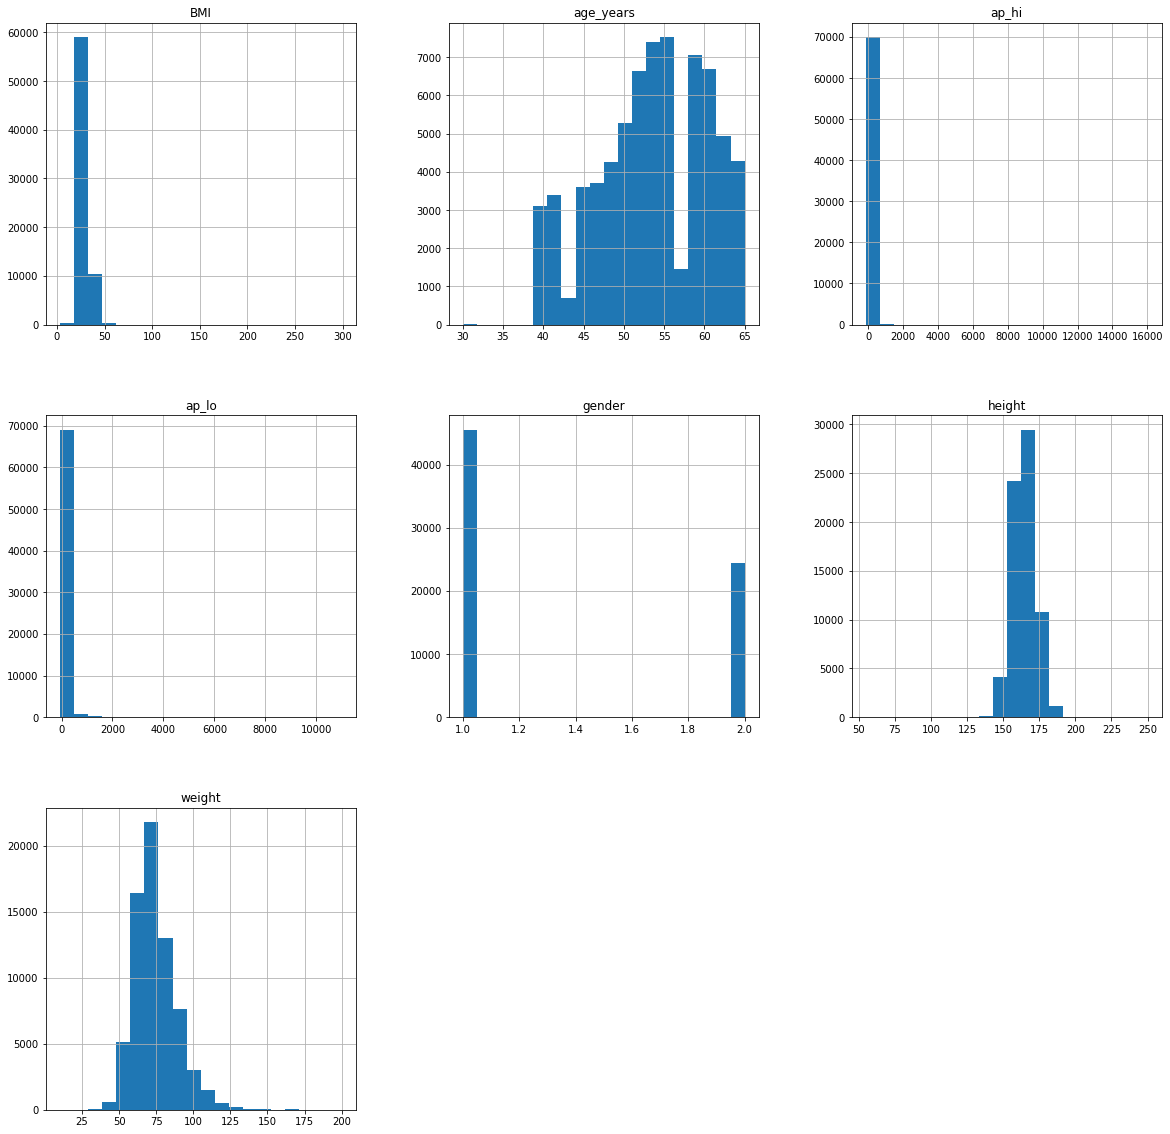

In [12]:
fig = plt.figure(figsize = (20,20))
ax = fig.gca()
cardio.hist(ax = ax, bins=20)

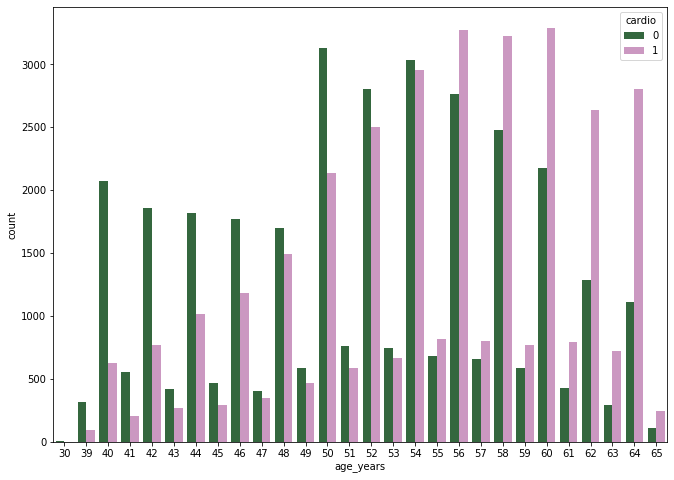

In [13]:
# plotting age in years vs cardio to see at what 
# age does the number of people with CVD exceed the number of people without CVD?
# from the plot it appears that the switch happens at age 55 
rcParams['figure.figsize'] = 11, 8

sns.countplot(x='age_years', hue='cardio', data = cardio, palette="cubehelix")


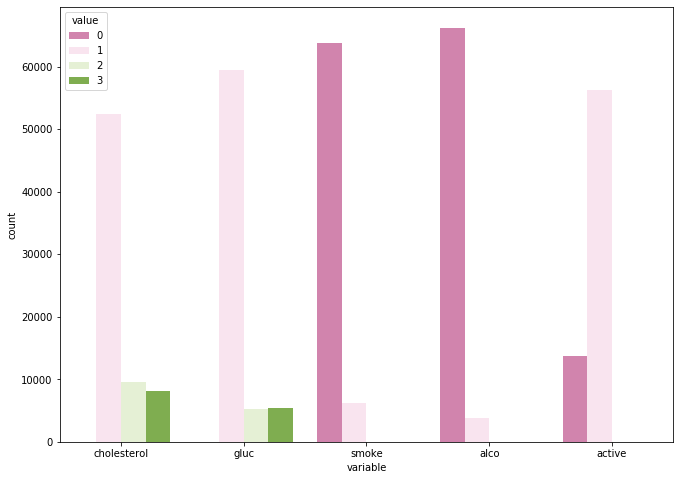

In [14]:
# plotting categorical variables

cardio_categorical = cardio.loc[:,['cholesterol','gluc', 'smoke', 'alco', 'active']]
sns.countplot(x="variable", hue="value",data= pd.melt(cardio_categorical), palette="PiYG")

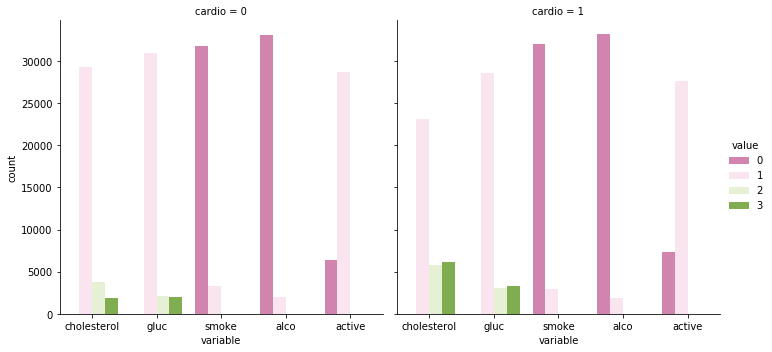

In [15]:
# plotting categorical variables by separating them with cardio positive and negative 
# It can be clearly seen that patients with CVD have higher cholesterol and blood glucose level. And, generally speaking less active.


df = pd.melt(cardio, id_vars=['cardio'], value_vars=['cholesterol','gluc', 'smoke', 'alco', 'active'])
sns.catplot(x="variable", hue="value", col="cardio", data=df, kind="count", palette="PiYG")



In [16]:
# To figure out whether "1" stands for women or men in gender column, let's calculate the mean of height per gender. 
# For now, lets assume that men are taller than women on average.
# Average height for "2" gender is greater, than for "1" gender, therefore "1" stands for women. 
cardio.groupby('gender')['height'].mean()



gender
1    161.355612
2    169.947895
Name: height, dtype: float64

# cleaning data 

In [17]:
print("There is {} missing values in data frame".format(cardio.isnull().sum().sum()))

There is 0 missing values in data frame


In [18]:
print("There are {} duplicated values in data frame".format(cardio.duplicated().sum()))

There are 3816 duplicated values in data frame


In [19]:
# in some cases diastolic pressure is higher than systolic, which is also incorrect. How many records are inaccurate in terms of blood pressure?

print("Diastolic pressure is higher than systolic one in {} cases".format(cardio[cardio['ap_lo']> cardio['ap_hi']].shape[0]))



Diastolic pressure is higher than systolic one in 1234 cases


In [20]:
# Let's get rid of the outliers, moreover blood pressure could not be negative value!

cardio.drop(cardio[(cardio['ap_hi'] > cardio['ap_hi'].quantile(0.975)) | (cardio['ap_hi'] < cardio['ap_hi'].quantile(0.025))].index,inplace=True)
cardio.drop(cardio[(cardio['ap_lo'] > cardio['ap_lo'].quantile(0.975)) | (cardio['ap_lo'] < cardio['ap_lo'].quantile(0.025))].index,inplace=True)


Diastolic pressure is higher than systolic in 0 cases


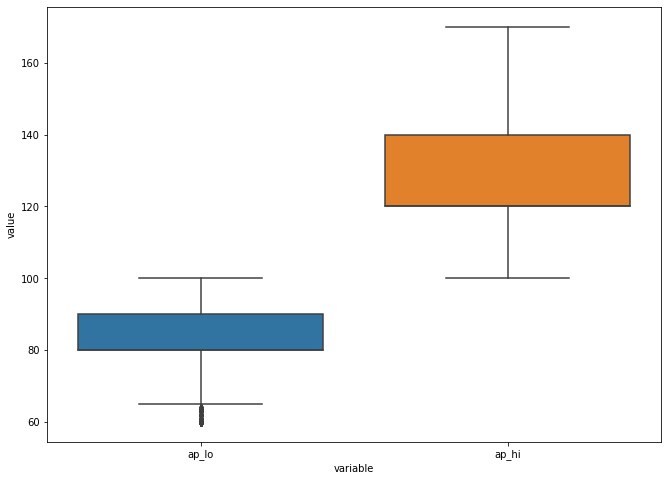

In [21]:
blood_pressure = cardio.loc[:,['ap_lo','ap_hi']]
sns.boxplot(x = 'variable',y = 'value',data = blood_pressure.melt())
print("Diastolic pressure is higher than systolic in {} cases".format(cardio[cardio['ap_lo']> cardio['ap_hi']].shape[0]))



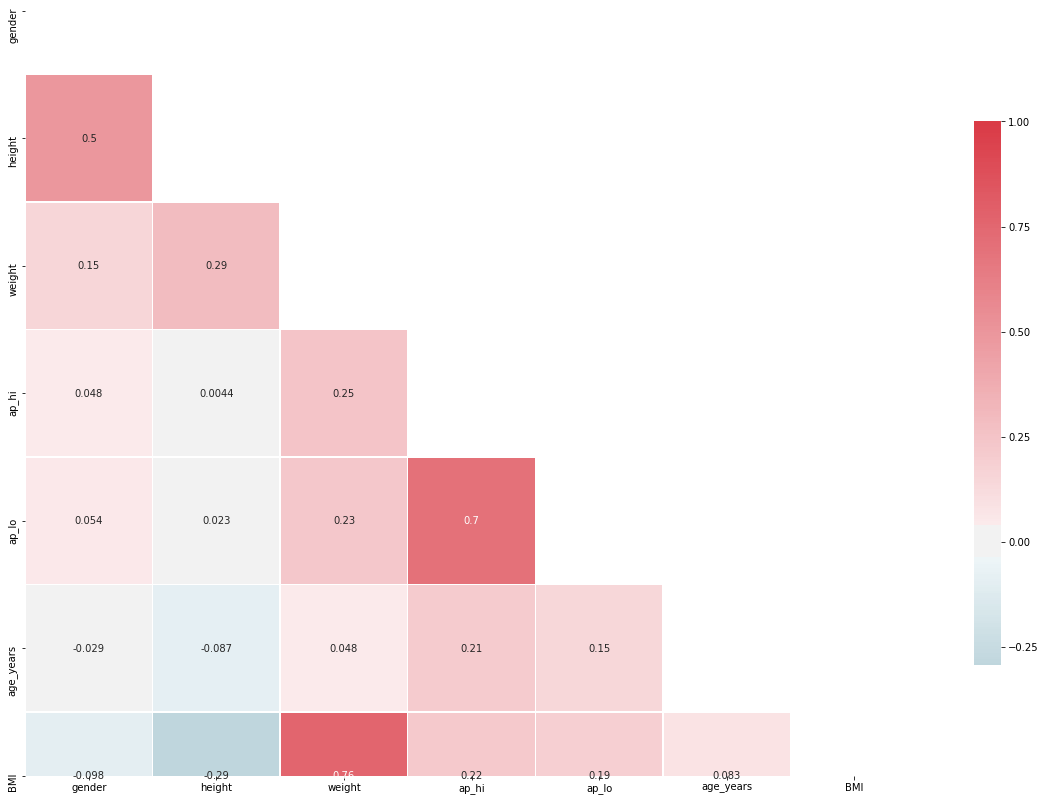

In [22]:
# multivariate analysis

corr = cardio.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20,20))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

# Logistic regression 

In [23]:
# Getting the X and y values from the dataframe

X = cardio.iloc[:, :-1]
y = cardio.iloc[:, 12]

In [24]:
# Importing the test and train split library

from sklearn.model_selection import train_test_split

In [25]:
# Splitting the dataset into test and train split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [26]:
# Scaling the variables using standard scaler object

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [27]:
# Fitting the logistic regression on the test and training set

from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

/Users/swethach/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
# Getting the predictions for the X_test

y_pred = classifier.predict(X_test)

In [29]:
# Calculating the accuracy
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[5362, 1344],
       [2290, 4243]])

In [30]:
# Calculating the area under the curve

from sklearn import metrics

auc = metrics.roc_auc_score(y_test, y_pred)
auc

0.7245271876488948

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.80      0.75      6706
           1       0.76      0.65      0.70      6533

    accuracy                           0.73     13239
   macro avg       0.73      0.72      0.72     13239
weighted avg       0.73      0.73      0.72     13239



# Gaussian Naive Bayes classification 

In [32]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [33]:
# Getting the predictions for the X_test

y_pred = classifier.predict(X_test)

In [34]:
# Calculating the accuracy
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[5472, 1234],
       [2618, 3915]])

In [35]:
# Calculating the area under the curve

from sklearn import metrics

auc = metrics.roc_auc_score(y_test, y_pred)
auc

0.7076254765489156

# Support Vector Machine classifier 

In [36]:
from sklearn.svm import SVC

classifier = SVC(kernel = 'linear')
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [37]:
# Getting the predictions for the X_test

y_pred = classifier.predict(X_test)

In [38]:
# Calculating the accuracy
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[5567, 1139],
       [2510, 4023]])

In [39]:
# Calculating the area under the curve

from sklearn import metrics

auc = metrics.roc_auc_score(y_test, y_pred)
auc

0.7229744134586804